In [14]:
import pandas as pd
import matplotlib.pyplot as plt   
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
import seaborn as sns

In [15]:
INFO = 'Agriqo(slider1).csv'

data = pd.read_csv(INFO)
data.head()

,Agricultural zone,month(chara),rainfall (mm),temperature(avg),humidity(avg),sunlight(hour),direction of wind(deg),velocity of wind(km/h),label
0,1,7.5,111.70,28.50,88.40,23.30,175.00,6.50,Aman
1,1,7.5,111.95,30.71,90.86,19.97,168.65,13.00,Aman
2,1,7.5,104.03,32.69,81.75,24.56,179.84,13.96,Aman
3,1,7.5,104.63,31.49,91.65,23.51,171.91,0.94,Aman
4,1,7.5,113.49,32.72,94.89,21.21,182.63,11.91,Aman


In [16]:
data.describe()

,Agricultural zone,month(chara),rainfall (mm),temperature(avg),humidity(avg),sunlight(hour),direction of wind(deg),velocity of wind(km/h)
count,5963.000000,5963.000000,5963.000000,5963.000000,5963.000000,5963.000000,5963.000000,5963.000000
mean,7.151937,7.474593,27.282056,25.255046,74.807979,47.665197,185.007885,6.407775
std,3.936351,3.807521,32.469934,4.689685,9.063135,8.836584,32.796560,11.879144
min,1.000000,1.000000,0.000000,0.010000,23.850000,17.820000,7.810000,0.000000
25%,4.000000,4.000000,4.455000,22.410000,69.065000,43.275000,166.110000,2.340000
50%,7.000000,9.000000,11.730000,25.560000,75.250000,49.770000,190.070000,4.980000
75%,10.000000,11.000000,43.600000,28.660000,80.990000,53.950000,207.485000,8.790000
max,14.000000,12.750000,208.920000,35.640000,98.770000,74.640000,267.700000,212.760000


In [17]:
data['label'].unique()

array(['Aman', 'red lentil', 'tomato', 'wheat/gom', 'banana',
       'robi brinjal', 'khorip brinjal', 'sugarcane', 'soybean', 'Boro',
       'potato', 'mango', 'robi pointed gourd', 'khorip pointed grourd',
       'pineapple', 'robi green chilli ', 'khorip green chilli', 'Tula',
       'Rabi Cucumber', 'Kharif cucumber', 'garlic', 'robi lau (gourd)',
       'khorip lau (grourd)', 'Khorip Mug 1', 'Robi Mug', 'Badam robi',
       'Badam Kharip - 1', 'Guava', 'jackfruit', 'indian jujube', 'jute',
       'licchi', 'corn khorip-1', 'corn robi', 'masterd seed',
       'robi onion', 'khorip onion', 'papaya', 'robi pumpkin Cucurbita',
       'khorip pumpkin Cucurbita', 'Aush'], dtype=object)

In [18]:
data['label'].value_counts()

label
Aush                        240
Boro                        224
corn robi                   224
potato                      224
Aman                        224
masterd seed                208
sugarcane                   206
red lentil                  192
wheat/gom                   192
jute                        176
robi green chilli           176
robi brinjal                160
khorip brinjal              160
Badam robi                  160
tomato                      160
khorip lau (grourd)         160
robi onion                  160
robi pumpkin Cucurbita      160
khorip pumpkin Cucurbita    160
robi lau (gourd)            160
jackfruit                   144
Robi Mug                    144
garlic                      144
khorip green chilli         144
corn khorip-1               128
Guava                       128
khorip pointed grourd       128
Rabi Cucumber               128
licchi                      112
banana                      112
papaya                      112
Kh

In [19]:
new_data = data.drop("label",axis='columns')
corr=new_data.corr()
corr

,Agricultural zone,month(chara),rainfall (mm),temperature(avg),humidity(avg),sunlight(hour),direction of wind(deg),velocity of wind(km/h)
Agricultural zone,1.000000,0.013665,0.013016,-0.004150,0.020276,-0.012878,-0.277166,0.010927
month(chara),0.013665,1.000000,0.115214,0.160951,0.342127,-0.100146,-0.239279,0.029832
rainfall (mm),0.013016,0.115214,1.000000,0.463926,0.492166,-0.709872,-0.247161,0.032639
temperature(avg),-0.004150,0.160951,0.463926,1.000000,0.237406,-0.186430,-0.189675,0.035250
humidity(avg),0.020276,0.342127,0.492166,0.237406,1.000000,-0.529210,-0.213844,0.029418
sunlight(hour),-0.012878,-0.100146,-0.709872,-0.186430,-0.529210,1.000000,0.215304,0.054143
direction of wind(deg),-0.277166,-0.239279,-0.247161,-0.189675,-0.213844,0.215304,1.000000,0.017223
velocity of wind(km/h),0.010927,0.029832,0.032639,0.035250,0.029418,0.054143,0.017223,1.000000


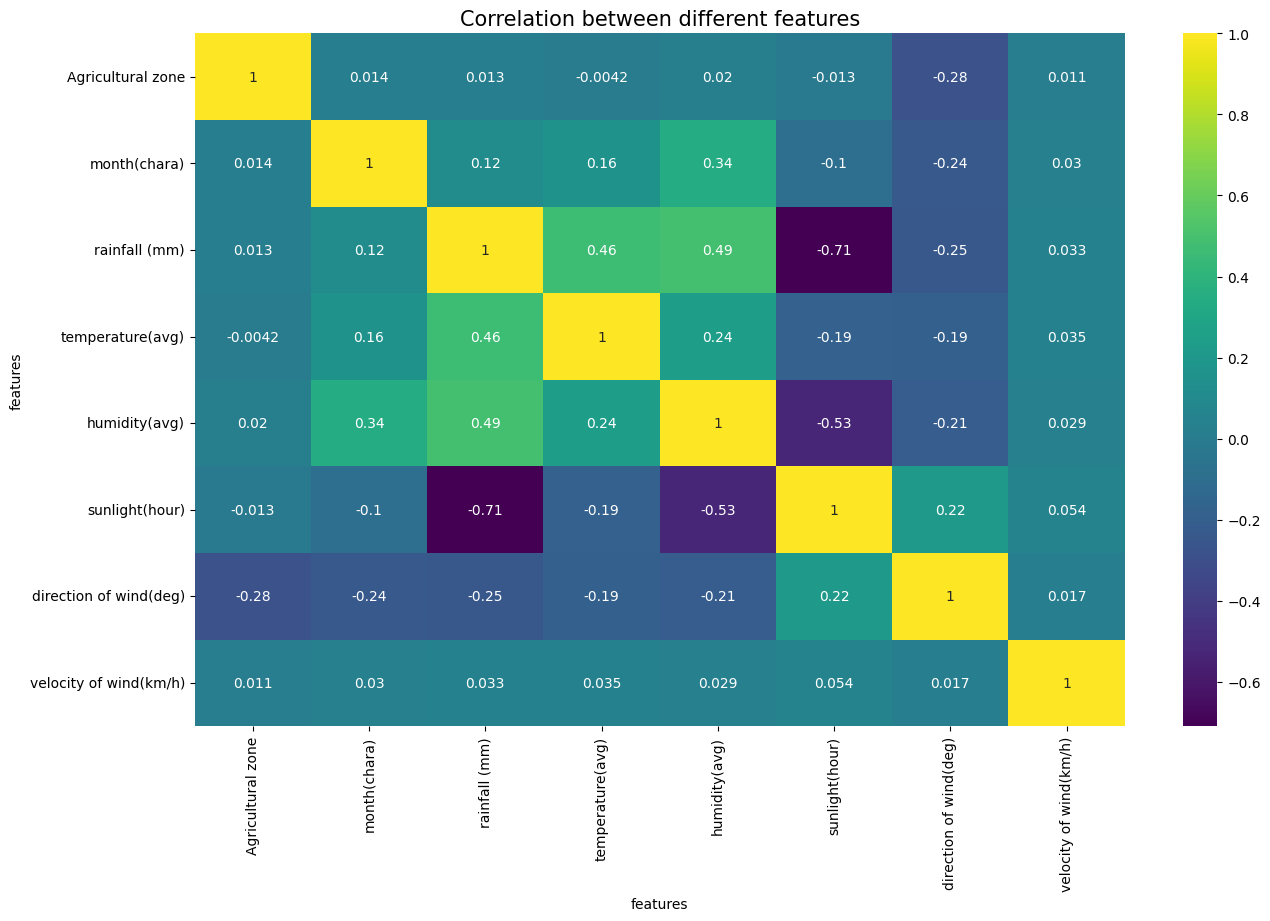

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(corr,
            annot=True,
            cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
 
plt.title('Correlation between different features',
          fontsize=15,
          c='black')
plt.show()

In [24]:
inputs = data[['Agricultural zone','month(chara)','rainfall (mm)','temperature(avg)','humidity(avg)','sunlight(hour)','direction of wind(deg)','velocity of wind(km/h)']]

outputs = data[['label']]

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(inputs,outputs,test_size=0.2,random_state=42)

Y_test # print X_train,X_test,Y_train

,label
705,wheat/gom
3328,khorip lau (grourd)
1344,sugarcane
1219,sugarcane
1193,khorip brinjal
...,...
1844,potato
1869,potato
2829,Rabi Cucumber
2406,robi green chilli


In [ ]:
model = HistGradientBoostingClassifier(random_state=42)

model.fit(X_train,Y_train)

predicted_values = model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test,predicted_values)

accuracy


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.636211232187762

In [29]:
pre = model.predict([[3,40,10,30.50,50.0,9,40]])
pre

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['Boro'], dtype=object)